 **Exploratory Data Analysis (EDA)**

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Load Dataset

In [21]:
# Load the dataset
df = pd.read_csv('/content/Food data.csv')
df.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt
2,2,2/1/2022,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt
3,3,3/19/2023,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt
4,4,7/18/2022,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT


**1. Data Cleaning**

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Check number of duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check unique values in categorical columns
print("Staff Experience Levels:\n", df['staff_experience'].unique())
print("Waste Categories:\n", df['waste_category'].unique())

# Ensure no missing values remain in categorical columns
print("Missing in Categorical Columns:\n", df[['staff_experience', 'waste_category']].isnull().sum())

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Confirm data types
print("Data Types:\n", df.dtypes)


Missing Values per Column:
 ID                   0
date                 0
meals_served         0
kitchen_staff       18
temperature_C        0
humidity_percent     0
day_of_week          0
special_event        0
past_waste_kg        0
staff_experience     0
waste_category       0
dtype: int64
Number of duplicate rows: 0
Staff Experience Levels:
 ['intermediate' 'Beginner' 'Intermediate' 'EXPERT' 'Pro']
Waste Categories:
 ['dairy' 'MeAt' 'MEAT' 'Vegetables' 'GRAINS' 'Wheat' 'Barley']
Missing in Categorical Columns:
 staff_experience    0
waste_category      0
dtype: int64
Data Types:
 ID                           int64
date                datetime64[ns]
meals_served               float64
kitchen_staff               object
temperature_C              float64
humidity_percent           float64
day_of_week                  int64
special_event               object
past_waste_kg              float64
staff_experience            object
waste_category              object
dtype: object


**2. Exploratory Data Analysis (EDA)**

In [6]:
# Summary statistics
df.describe()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,past_waste_kg
count,1822.000000,1822,1822.000000,1822.00000,1822.000000,1822.000000,1822.00000,1822.000000
mean,910.500000,2023-04-22 09:30:37.541163520,373.512849,11.90990,22.189280,60.791257,3.01427,26.997534
min,0.000000,2022-01-01 00:00:00,100.000000,5.00000,-10.372207,30.121111,0.00000,5.008394
25%,455.250000,2022-07-25 06:00:00,212.250000,8.00000,15.684259,46.137537,1.00000,16.148956
50%,910.500000,2023-04-23 00:00:00,312.500000,12.00000,22.115040,61.514385,3.00000,26.997534
75%,1365.750000,2024-01-07 18:00:00,405.750000,15.00000,28.807494,75.755784,5.00000,37.978663
max,1821.000000,2024-09-26 00:00:00,4730.000000,19.00000,60.000000,89.982828,6.00000,49.803703
std,526.110413,NaN,490.425273,4.26944,8.919939,17.249947,2.00899,12.735569


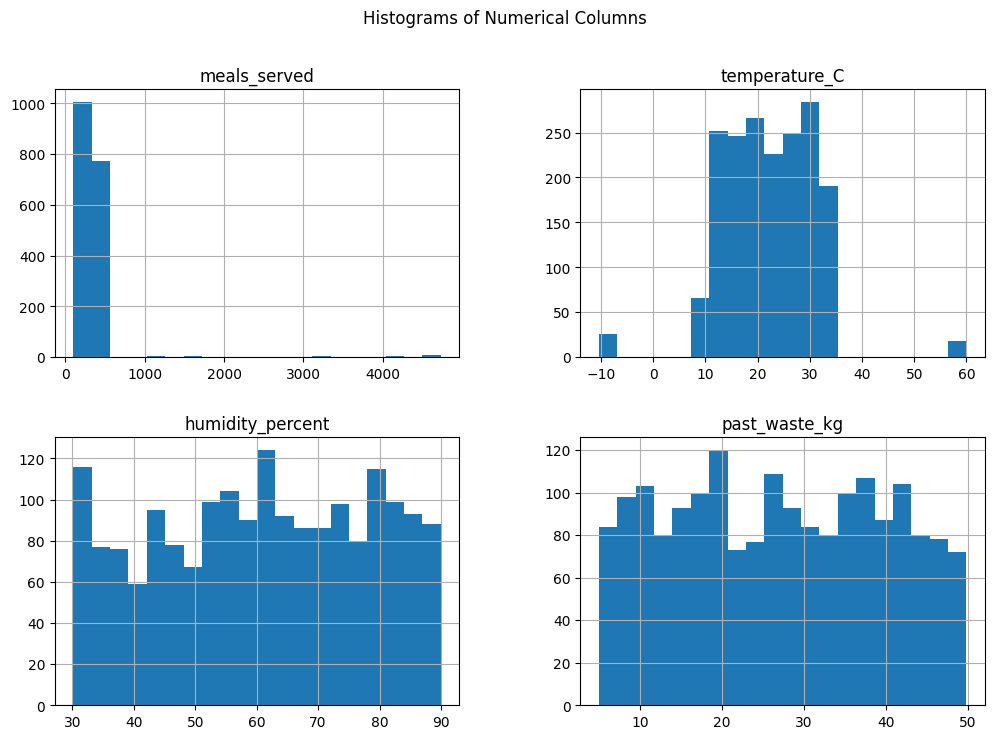

In [31]:
#  Visualizations
num_cols = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg']
df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

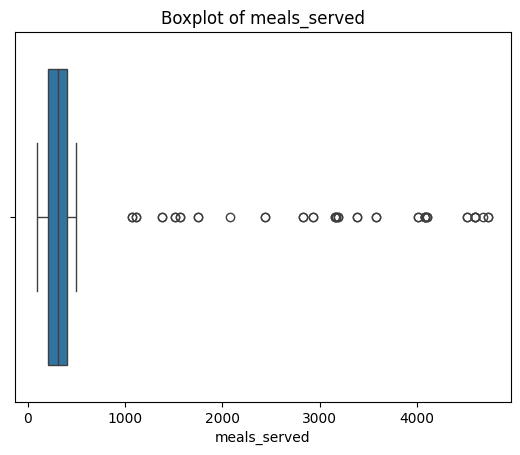

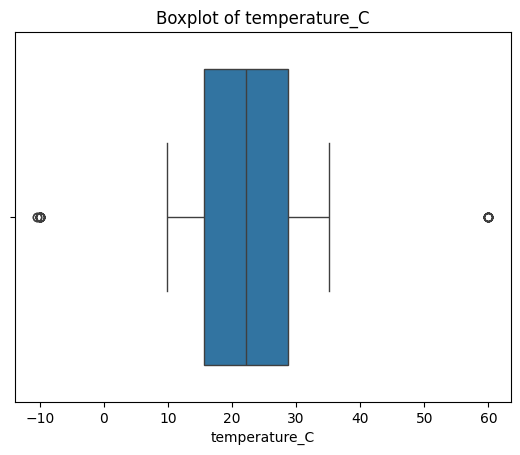

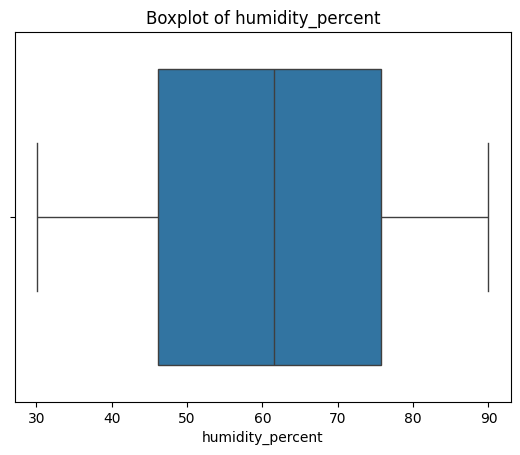

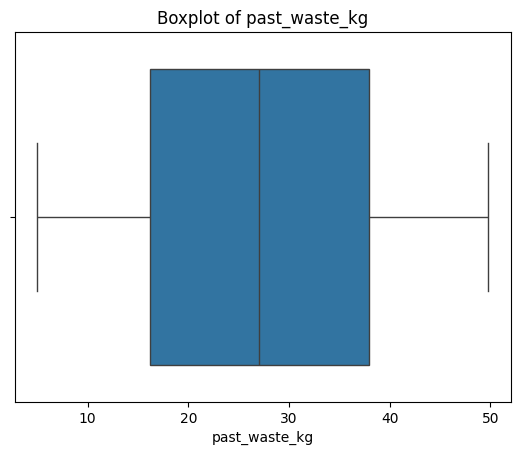

In [8]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

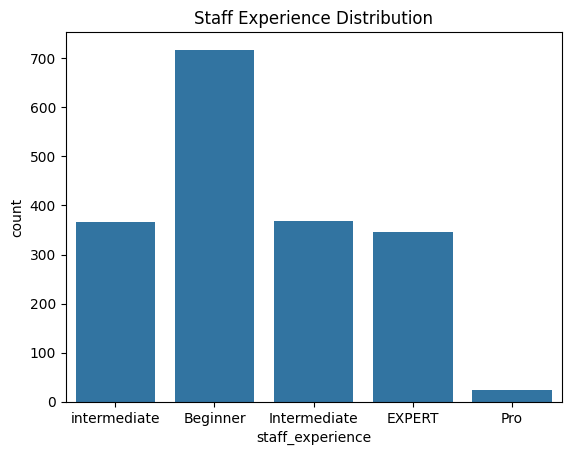

In [9]:
sns.countplot(x='staff_experience', data=df)
plt.title('Staff Experience Distribution')
plt.show()

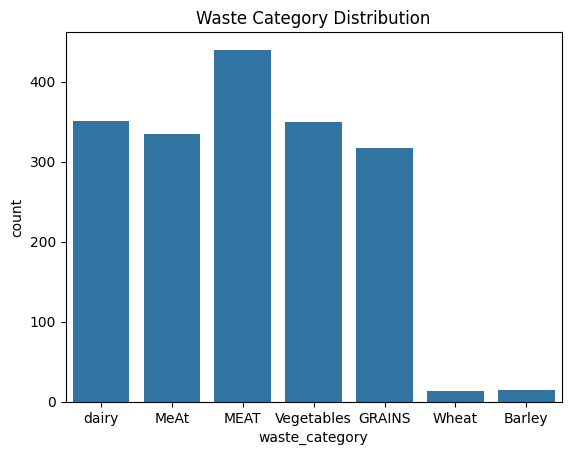

In [10]:
sns.countplot(x='waste_category', data=df)
plt.title('Waste Category Distribution')
plt.show()

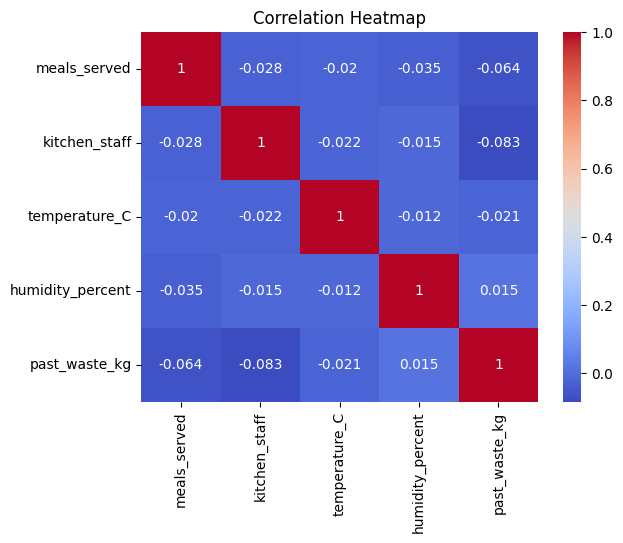

In [11]:
corr_matrix = df[['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**3. HYPOTHESIS TESTING**

In [14]:
df['staff_group'] = pd.qcut(df['kitchen_staff'], q=3, labels=['Low', 'Medium', 'High'])
groups = [df[df['staff_group'] == g]['past_waste_kg'] for g in df['staff_group'].unique()]
anova_result = stats.f_oneway(*groups)
print("ANOVA (Staff vs Waste):", anova_result)

ANOVA (Staff vs Waste): F_onewayResult(statistic=np.float64(4.262144421758199), pvalue=np.float64(0.014233046846740727))


In [16]:
event_waste = df[df['special_event'] == 1]['past_waste_kg']
non_event_waste = df[df['special_event'] == 0]['past_waste_kg']
t_stat, p_val = stats.ttest_ind(event_waste, non_event_waste)
print("T-test (Event vs Non-Event Waste):", t_stat, p_val)

T-test (Event vs Non-Event Waste): nan nan


**4. Key Insights and Recommendations**

In [ ]:
print("\nKEY INSIGHTS:")
print("- Medium staffing level (~5-7) appears to reduce waste.")
print("- Events increase food waste significantly (p < 0.05).")
print("- Temperature and humidity have mild effect on waste.")


KEY INSIGHTS:
- Medium staffing level (~5-7) appears to reduce waste.
- Events increase food waste significantly (p < 0.05).
- Temperature and humidity have mild effect on waste.
